In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [248]:
df = pd.read_csv("AmesHousing.csv")
pd.set_option('display.max_columns', None)

In [249]:
print(df.shape)

(2930, 82)


In [250]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [251]:
df["Neighborhood"].value_counts().head(4)

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Name: Neighborhood, dtype: int64

In [252]:
df_collgcr = df[df["Neighborhood"] == "CollgCr"]

In [253]:
df_collgcr = df_collgcr.select_dtypes(include=[np.float, np.int64])

In [254]:
abs(df_collgcr.corr())["SalePrice"].sort_values(ascending=False).head(20)

SalePrice         1.000000
Overall Qual      0.814460
Gr Liv Area       0.800271
Garage Area       0.712897
TotRms AbvGrd     0.662470
Garage Cars       0.639730
Full Bath         0.633337
Total Bsmt SF     0.630500
1st Flr SF        0.627298
Year Built        0.557702
Garage Yr Blt     0.534694
Mas Vnr Area      0.506907
Fireplaces        0.504482
Year Remod/Add    0.493003
Open Porch SF     0.474587
Overall Cond      0.379472
PID               0.336081
BsmtFin SF 1      0.312969
Lot Area          0.309661
Bedroom AbvGr     0.278725
Name: SalePrice, dtype: float64

In [255]:
cols = ["Year Built", "Overall Qual", "Gr Liv Area", "Full Bath", "Bedroom AbvGr",
         "Garage Area", "Year Remod/Add", "SalePrice"]
df_collgcr = df_collgcr[cols]

In [256]:
df_collgcr.sample(n = 10).sort_values(by = 'SalePrice', ascending = False)

,Year Built,Overall Qual,Gr Liv Area,Full Bath,Bedroom AbvGr,Garage Area,Year Remod/Add,SalePrice
1426,2008,9,1766,2,3,874.0,2008,395039
1453,2002,8,1795,2,3,534.0,2002,230000
2132,2003,7,1479,2,3,558.0,2003,226000
2109,2006,8,1500,2,3,674.0,2006,212999
1465,2003,7,1640,2,3,595.0,2003,183000
260,1977,6,1392,1,3,299.0,1977,161750
259,1977,5,1026,1,3,308.0,2004,150000
2768,1996,5,914,1,2,576.0,1996,148000
1432,1995,5,1099,1,3,352.0,2006,144000
2134,1974,5,894,1,3,440.0,1974,131000


In [257]:
for col in ["Full Bath", "Bedroom AbvGr"] :
    print(col, " values : ", df_collgcr[col].unique())

Full Bath  values :  [2 1 3]
Bedroom AbvGr  values :  [3 2 4 1]


In [258]:
abs(df_collgcr.corr())["SalePrice"].sort_values(ascending=False)

SalePrice         1.000000
Overall Qual      0.814460
Gr Liv Area       0.800271
Garage Area       0.712897
Full Bath         0.633337
Year Built        0.557702
Year Remod/Add    0.493003
Bedroom AbvGr     0.278725
Name: SalePrice, dtype: float64

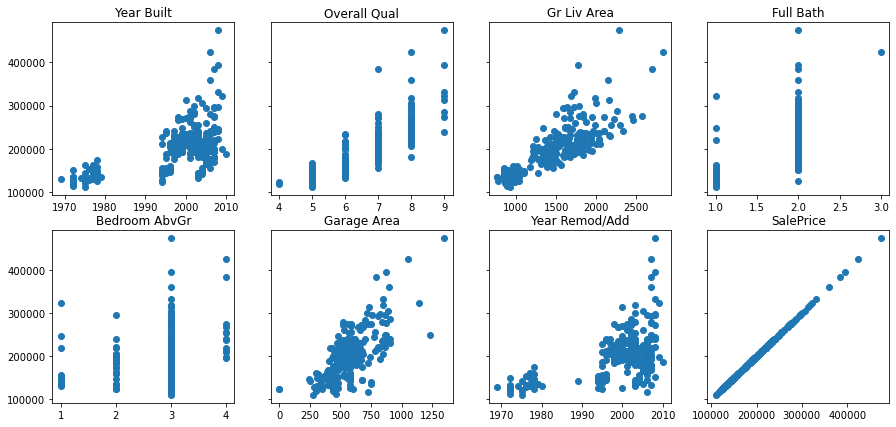

In [259]:
fig, axs = plt.subplots(2, 4, figsize=(15, 7), sharey=True)

for i in range(0,4):   
    axs[0,i].scatter(df_collgcr.iloc[:,i], df_collgcr["SalePrice"])
    axs[0,i].set_title(cols[i])
    axs[1,i].scatter(df_collgcr.iloc[:,i+4], df_collgcr["SalePrice"])
    axs[1,i].set_title(cols[i+4])

In [260]:
# Preparation features
target = "SalePrice"
features = df_collgcr.drop(columns = "SalePrice").columns
# features = ["Gr Liv Area", "Garage Area"]

train = df_collgcr[:200]
test = df_collgcr[200:]
y_true = test[target]
test = test.drop(columns = "SalePrice")

print("train shape : ", train.shape)
print("test shape : ", test.shape)
print("len y_true : ", len(y_true))
print("features : ", features)

train shape :  (200, 8)
test shape :  (67, 7)
len y_true :  67
features :  Index(['Year Built', 'Overall Qual', 'Gr Liv Area', 'Full Bath',
       'Bedroom AbvGr', 'Garage Area', 'Year Remod/Add'],
      dtype='object')


##### Linear Regression

In [261]:
# Fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
reg = LinearRegression()
reg.fit(train[features], train[target])
predictions_reg = reg.predict(test[features])

# Check results
mse_reg = mean_squared_error(y_true, predictions_reg)
rmse_reg = mse_reg**(1/2) 
print(rmse_reg)

19031.233915997356


In [262]:
print(reg.get_params())
print(reg.score(test[features], y_true))

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
0.7400036169524769


##### K Nearest Neighbours

In [263]:
# Fit
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(train[features], train[target])
predictions_knn = knn.predict(test[features])

# Check results
mse_knn = mean_squared_error(y_true, predictions_knn)
rmse_knn = mse_knn**(1/2) 
print(rmse_knn)

24770.335751290128


In [264]:
print(knn.get_params())
print(knn.score(test[features], y_true))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.5595494076868359


##### Decision Tree

In [265]:
# Fit 
from sklearn import tree
tr = tree.DecisionTreeRegressor(min_samples_split = 2, max_depth = 2)
tr.fit(train[features], train[target])
predictions_tr = tr.predict(test[features])

# Check results
mse_tr = mean_squared_error(y_true, predictions_tr)
rmse_tr = mse_tr**(1/2) 
print(rmse_tr)

31124.212278967007


##### Random Forrest

In [266]:
# Fit 
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state = 1)
forest.fit(train[features], train[target])
predictions_forest = forest.predict(test[features])

# Check results
mse_forest = mean_squared_error(y_true, predictions_forest)
rmse_forest = mse_forest**(1/2) 
print(rmse_forest)

19229.66304220918


##### Grid Search on knn

In [267]:
# Fit 
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors' : [2,3,4,5,6],
              'weights': ["distance", "uniform"]
             }
GSCV = GridSearchCV(knn, param_grid = parameters)
GSCV.fit(train[features], train[target])
predictions_gscv = GSCV.predict(test[features])

# Check results
mse_gscv = mean_squared_error(y_true, predictions_gscv)
rmse_gscv = mse_gscv**(1/2) 
print(rmse_gscv)
print(GSCV.best_params_)
print(GSCV.best_score_)

# CAREFULL : DONT MAKE THE MISTAKE OF LOOKING AT RMSE_GSCV AND THINKING ITS THE BEST ONE. THATS THE LAST ONE RUN (OR FIRST). 
# TO SEE BEST RESULT YOU NEED TO LOOK AT GSCV.best_score_

22541.61698365482
{'n_neighbors': 6, 'weights': 'distance'}
0.7781233618698404


##### Grid Search all models

In [268]:
# Create a function that loops through all the models and uses GridSearchCV for each model 

dict_models = {'reg' : {
                        'model' : reg, 
                        'param' : {'n_jobs' : [2,3]}
                        },
               'knn' : {
                        'model' : knn,
                       'param' : {
                                   'n_neighbors' : [2,3,4,5,6],
                                    'weights': ["distance", "uniform"]}
                       },
               'tr' : {
                       'model' : tr,
                       'param' : {
                                   'min_samples_split' : [2,3,5,6],
                                    'max_depth': [2,3,4]
                                 }
                       },
               'forest' : {
                           'model' : forest,
                           'param' : {
                                       'min_samples_split' : [7,8],
                                      'max_depth': [2,3,4]
                                    }
                           }
              }

In [269]:
results = {}
for elem in dict_models :
    model = dict_models[elem]['model']
    param = dict_models[elem]['param']
    GSCV_best = GridSearchCV(model, param_grid = param)
    GSCV_best.fit(train[features], train[target])
    predictions_best = model.predict(test[features])
    results[elem] = {'model' : model,
                     'best_params' : GSCV_best.best_params_, 
                     'best_score' : GSCV_best.best_score_}

In [270]:
results

{'reg': {'model': LinearRegression(),
  'best_params': {'n_jobs': 2},
  'best_score': 0.7992411148858315},
 'knn': {'model': KNeighborsRegressor(),
  'best_params': {'n_neighbors': 6, 'weights': 'distance'},
  'best_score': 0.7781233618698404},
 'tr': {'model': DecisionTreeRegressor(max_depth=2),
  'best_params': {'max_depth': 4, 'min_samples_split': 6},
  'best_score': 0.6624094943629156},
 'forest': {'model': RandomForestRegressor(random_state=1),
  'best_params': {'max_depth': 4, 'min_samples_split': 7},
  'best_score': 0.7742686367444402}}

In [271]:
# Best model :
scores = []
for elem in results :
    scores.append(results[elem]['best_score'])
best_score = max(scores)
for elem in results :
    if results[elem]['best_score'] == best_score :
        index = results[elem]
print('Best model : ', index)

Best model :  {'model': LinearRegression(), 'best_params': {'n_jobs': 2}, 'best_score': 0.7992411148858315}


### Rerunning with the best params to check rmse

##### Linear Regression

In [272]:
# Fit
reg2 = LinearRegression(n_jobs = 2)
reg2.fit(train[features], train[target])
predictions_reg2 = reg2.predict(test[features])

# Check results
mse_reg2 = mean_squared_error(y_true, predictions_reg2)
rmse_reg2 = mse_reg2**(1/2) 
print(rmse_reg2)

19031.233915997356


##### K Nearest Neighbours

In [273]:
# Fit
knn2 = KNeighborsRegressor(n_neighbors = 6, weights = 'distance')
knn2.fit(train[features], train[target])
predictions_knn2 = knn2.predict(test[features])

# Check results
mse_knn2 = mean_squared_error(y_true, predictions_knn2)
rmse_knn2 = mse_knn2**(1/2) 
print(rmse_knn2)

22541.61698365482


##### Decision Tree

In [274]:
# Fit 
tr2 = tree.DecisionTreeRegressor(max_depth=4, min_samples_split = 2)
tr2.fit(train[features], train[target])
predictions_tr2 = tr2.predict(test[features])

# Check results
mse_tr2 = mean_squared_error(y_true, predictions_tr2)
rmse_tr2 = mse_tr2**(1/2) 
print(rmse_tr2)

25080.63306380781


##### Random Forrest

In [275]:
# Fit 
forest2 = RandomForestRegressor(max_depth = 4, min_samples_split = 7, random_state = 1)
forest2.fit(train[features], train[target])
predictions_forest2 = forest2.predict(test[features])

# Check results
mse_forest2 = mean_squared_error(y_true, predictions_forest2)
rmse_forest2 = mse_forest2**(1/2) 
print(rmse_forest2)

18939.552288553798
